# Fit the LBA on individual data

In [1]:
from rlssm.utility.load_data import load_example_dataset

# import some example data:
data = load_example_dataset(hierarchical_levels=1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,23,1,1,39,33,2,1,1,1.305523,0,0
1,23,1,2,50,41,3,1,1,0.916909,1,0
2,23,1,3,44,43,4,2,1,0.737469,0,0
3,23,1,4,51,30,3,1,2,0.764511,0,0
4,23,1,5,62,48,4,3,2,0.721492,1,0


## Initialize the model

In [2]:
from rlssm.model.models_LBA import LBAModel_2A

model = LBAModel_2A(hierarchical_levels=1)

## Fit

In [3]:
# sampling parameters
n_warmup = 500
n_sampling = 500
n_chains = 2
n_thin = 5

In [4]:
model_fit = model.fit(
    data,
    thin=n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

### Get rhat

In [5]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.005480,lp__
k,0.999161,k
sp_trial_var,1.002180,sp_trial_var
ndt,1.025830,ndt
drift_cor,0.998381,drift_cor
...,...,...
log_lik[236],1.001630,log_lik[236]
log_lik[237],1.001660,log_lik[237]
log_lik[238],1.002940,log_lik[238]


### Get WAIC

In [6]:
model_fit.waic

{'lppd': -209.63929848093088,
 'p_waic': 5.580290005218151,
 'waic': 430.43917697229807,
 'waic_se': 33.36819490491877}

### Save results

In [7]:
model_fit.to_pickle()

Saving file as: /home/andrei/PycharmProjects/rlssm/docs/notebooks/LBA_2A.pkl


## Posteriors

In [8]:
model_fit.samples.describe()

,transf_drift_cor,transf_drift_inc,transf_k,transf_drift_variability,transf_sp_trial_var,transf_ndt
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.047601,0.124005,0.148608,0.717350,2.524727,0.608417
std,0.561160,0.164409,0.176494,0.210643,0.689969,0.052633
min,0.848488,0.000002,0.024047,0.286603,0.995520,0.342565
25%,1.652352,0.010144,0.058384,0.577790,2.036367,0.599223
50%,1.973920,0.053954,0.095118,0.676956,2.458300,0.624702
75%,2.365442,0.181870,0.170793,0.853248,2.872838,0.637649
max,3.513060,0.975849,1.623890,1.334370,4.305020,0.661225


In [9]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

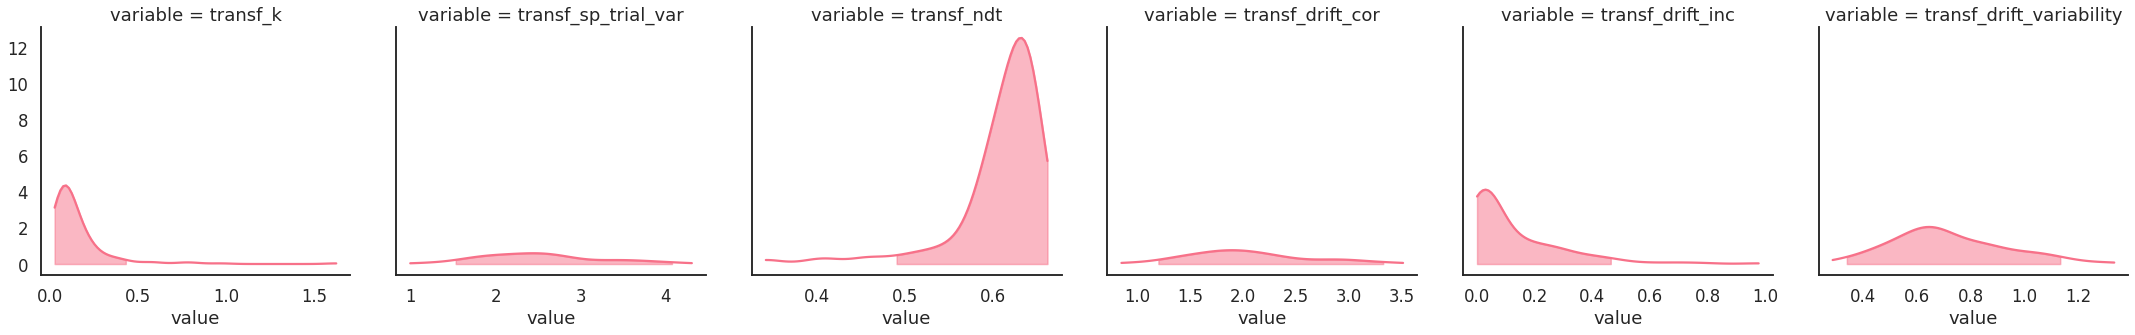

In [10]:
model_fit.plot_posteriors(height=5, show_intervals='HDI')

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         0.757644  1.108808  1.396902  1.775288  1.303536  1.445848   
2         0.706857  0.857231  1.133825  1.188797  0.712983  0.939862   
3         1.878442  0.890460  1.599073  1.566467  1.324313  1.196744   
4         1.077439  1.007013  1.063949  1.034365  1.034666  1.062056   
5         1.694413  1.395849  0.707221  1.643653  1.030164  0.898334   
...            ...       ...       ...       ...       ...       ...   
96        0.885677  0.833945  1.593426  1.554544  0.949011  1.079648   
97        0.917358  1.154760  0.683646  1.383080  0.791287  1.721880   
98        0.770037  1.670640  1.835202  1.193962  1.479005  1.245409   
99        1.413931  1.322566  1.073474  1.365895  0.910407  0.979064   
100       1.265538  1.203942  1.132204  1.071142  1.467127  1.040021   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.431243  1.281831  1.785029  1.802090  ...      1.0  1.0  1.0  1.0   
2         0.778845  0.909787  1.493907  1.537539  ...      1.0  1.0  1.0  1.0   
3         0.990333  1.807161  1.646523  1.046169  ...      1.0  1.0  1.0  1.0   
4         0.856534  1.475899  0.837866  1.399693  ...      1.0  1.0  1.0  1.0   
5         0.966687  0.793045  1.746848  1.375565  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.994353  1.216335  1.200036  1.303270  ...      1.0  1.0  1.0  1.0   
97        1.293904  1.280431  1.506124  0.979617  ...      1.0  1.0  1.0  1.0   
98        1.085779  1.254409  0.967823  1.240168  ...      1.0  1.0  1.0  1.0   
99        1.632254  1.797901  1.782589  0.867214  ...      1.0  1.0  1.0  1.0   
100       1.480502  1.716082  1.106497  0.893333  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         0.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,1.000000,1.273213,-0.032355,NaN,NaN,NaN,NaN,NaN,0.810937,1.063108,1.287993,1.497320,1.724954
2,1.000000,1.305921,0.139859,NaN,NaN,NaN,NaN,NaN,0.833882,1.073766,1.282428,1.494721,1.829483
3,0.983333,1.284454,0.011104,1.170285,1.170901,1.319179,1.469398,1.481663,0.788842,1.018210,1.287657,1.528789,1.786646
4,1.000000,1.198899,0.201609,NaN,NaN,NaN,NaN,NaN,0.775497,0.951485,1.194042,1.379832,1.665541
5,1.000000,1.195936,0.052867,NaN,NaN,NaN,NaN,NaN,0.783412,1.005766,1.199304,1.375862,1.610243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.962500,1.227683,0.157722,1.049146,1.089346,1.165270,1.225679,1.453707,0.784871,0.990887,1.225948,1.438254,1.721084
97,0.979167,1.315878,-0.061779,1.084820,1.151455,1.280836,1.404760,1.536354,0.781770,1.074440,1.339248,1.579070,1.840763
98,0.970833,1.295320,0.048601,1.234826,1.313793,1.481290,1.513085,1.666479,0.799866,1.020201,1.270688,1.542765,1.809246


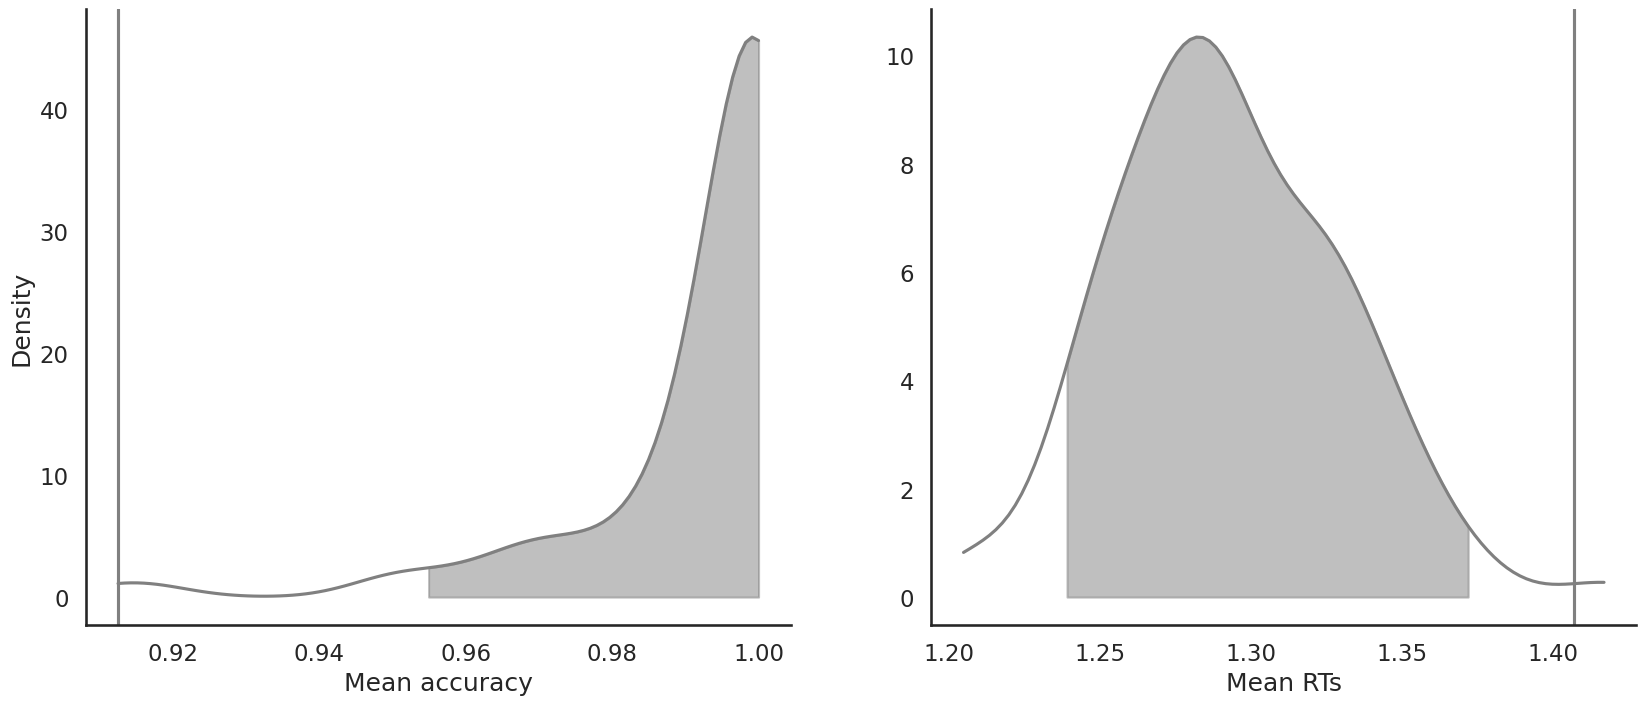

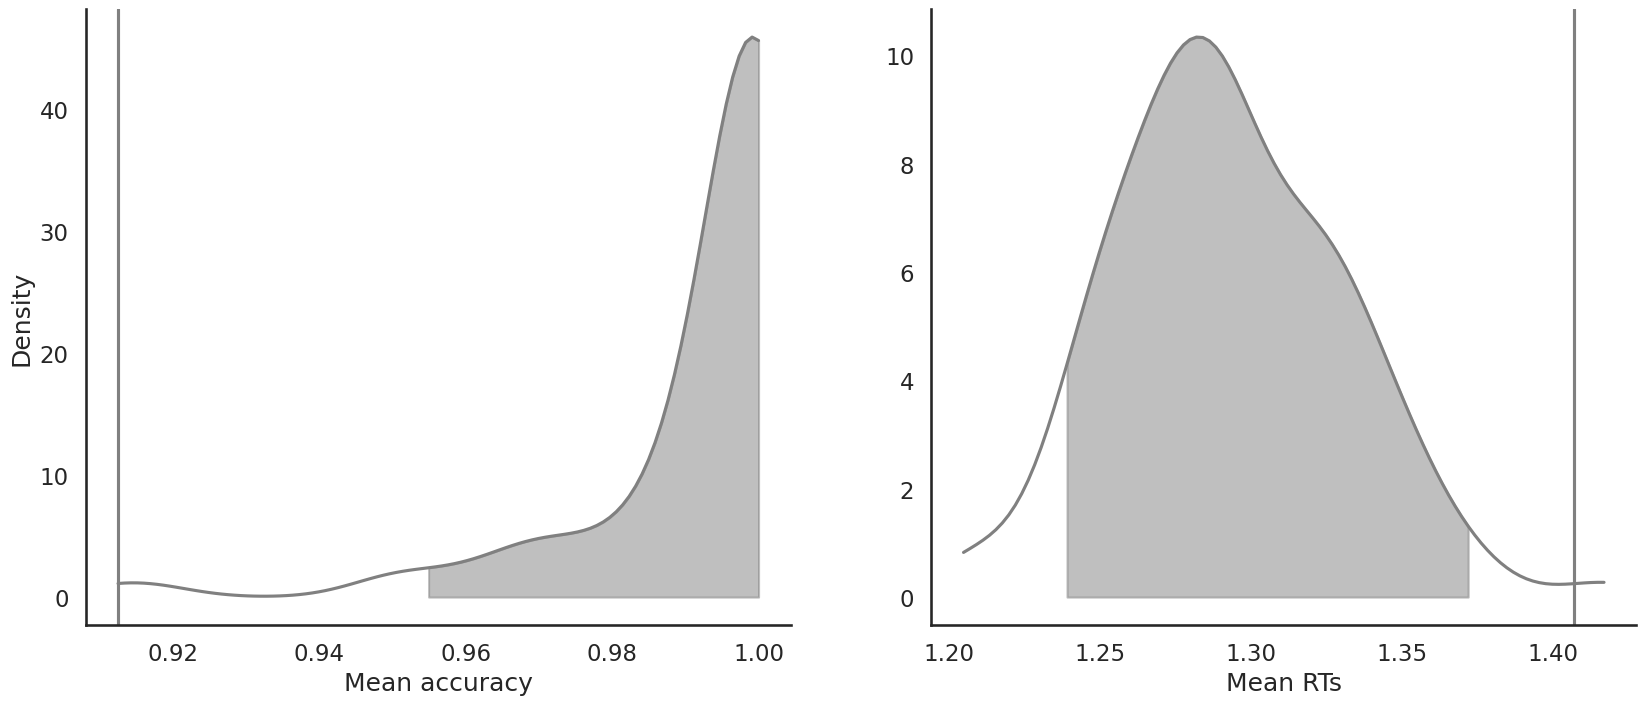

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20, 8), show_intervals='HDI')

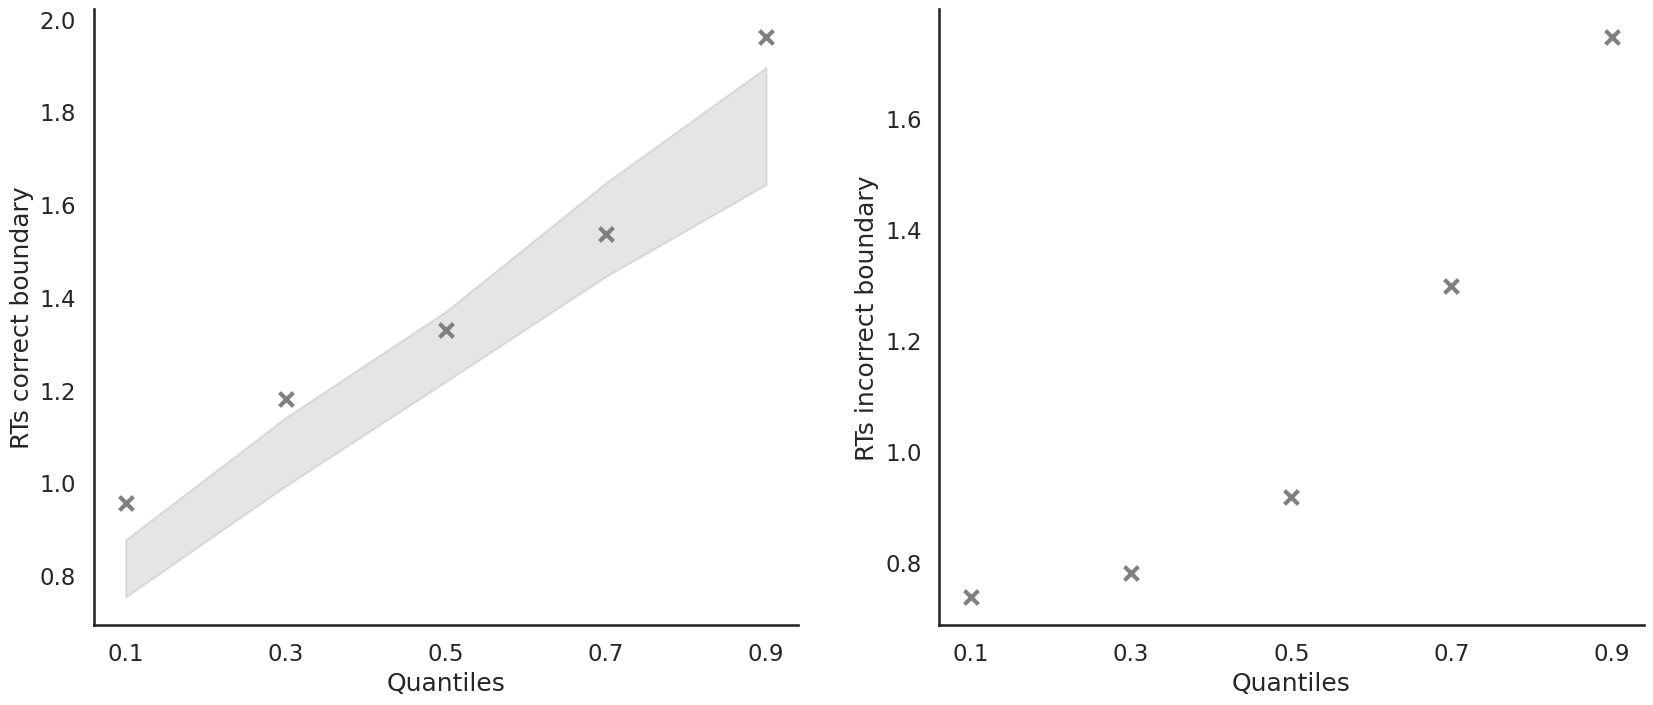

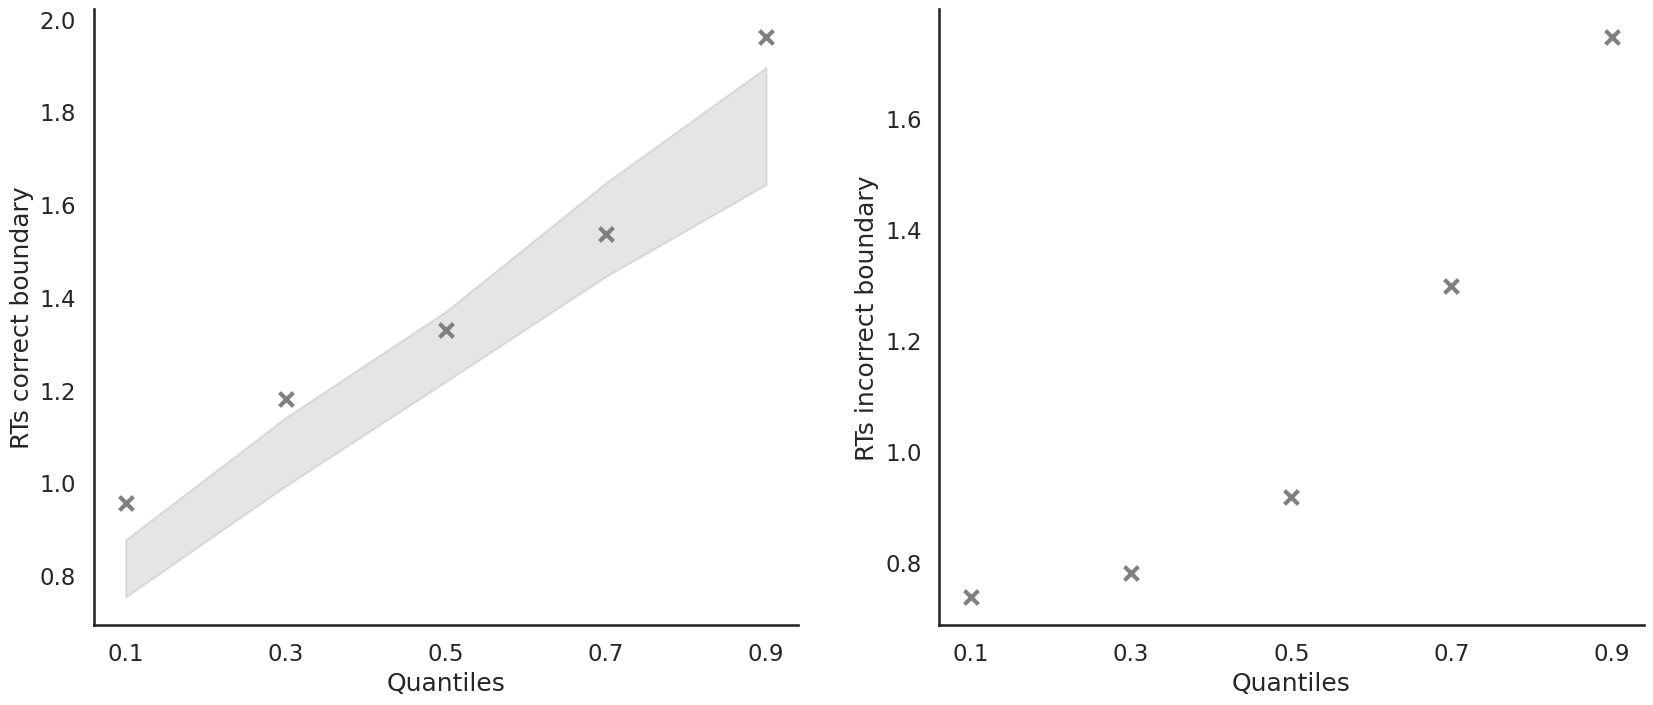

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades')

### Grouped

In [15]:
import pandas as pd
import numpy as np

# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

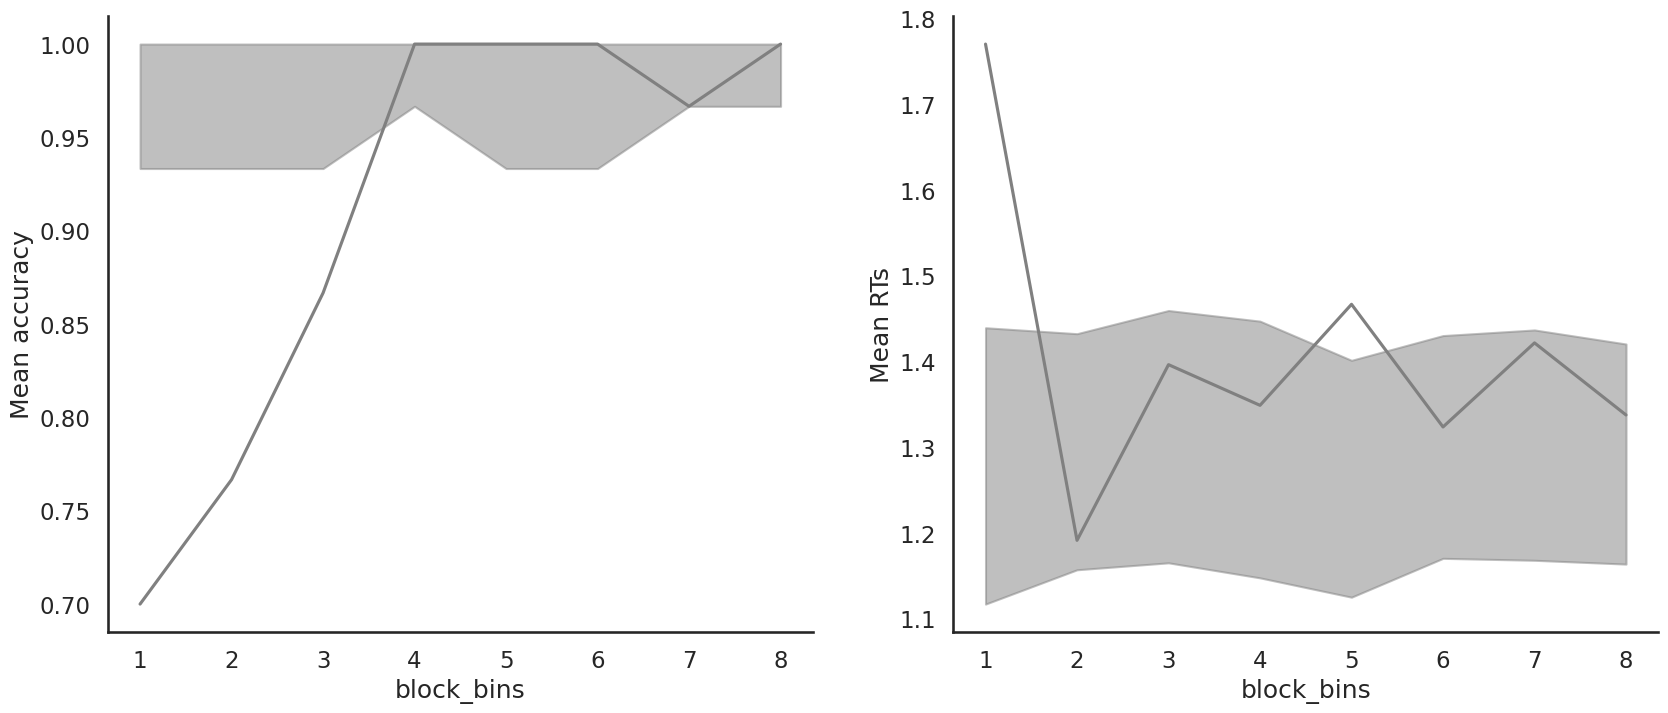

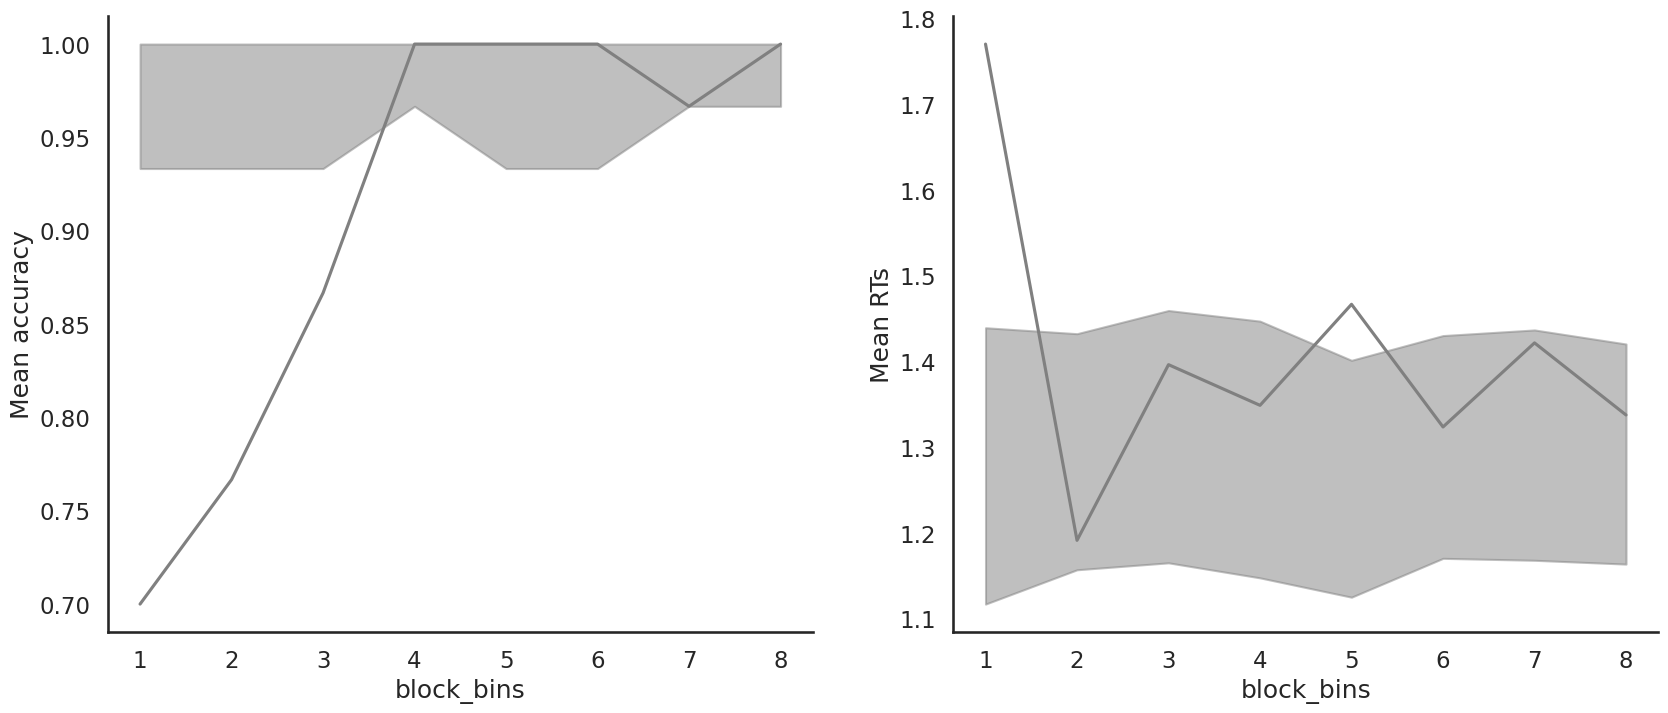

In [18]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=100,
                                                  figsize=(20, 8))

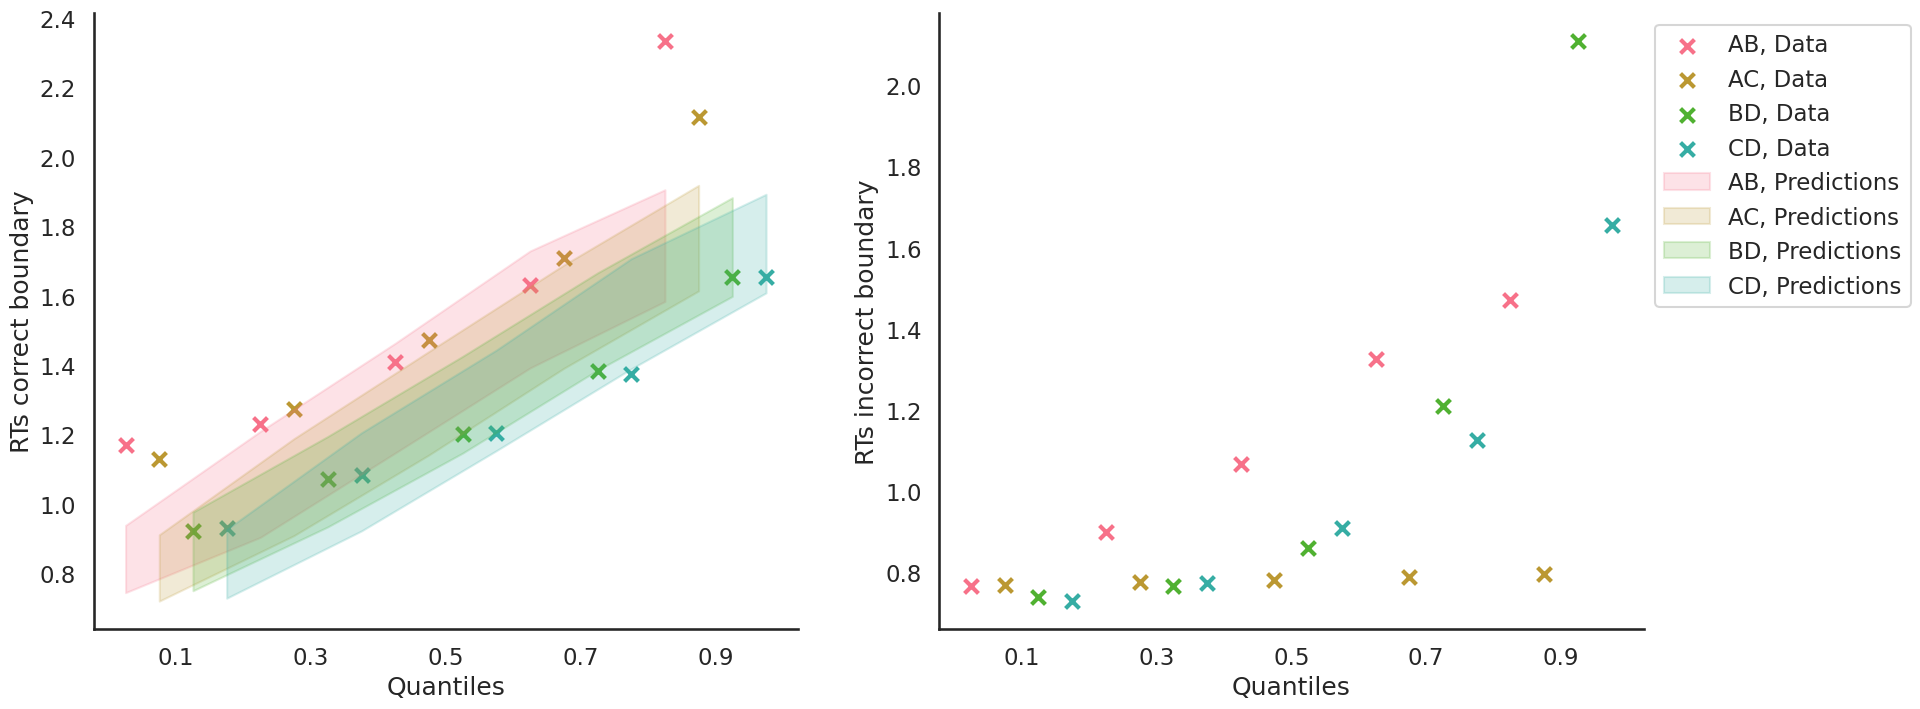

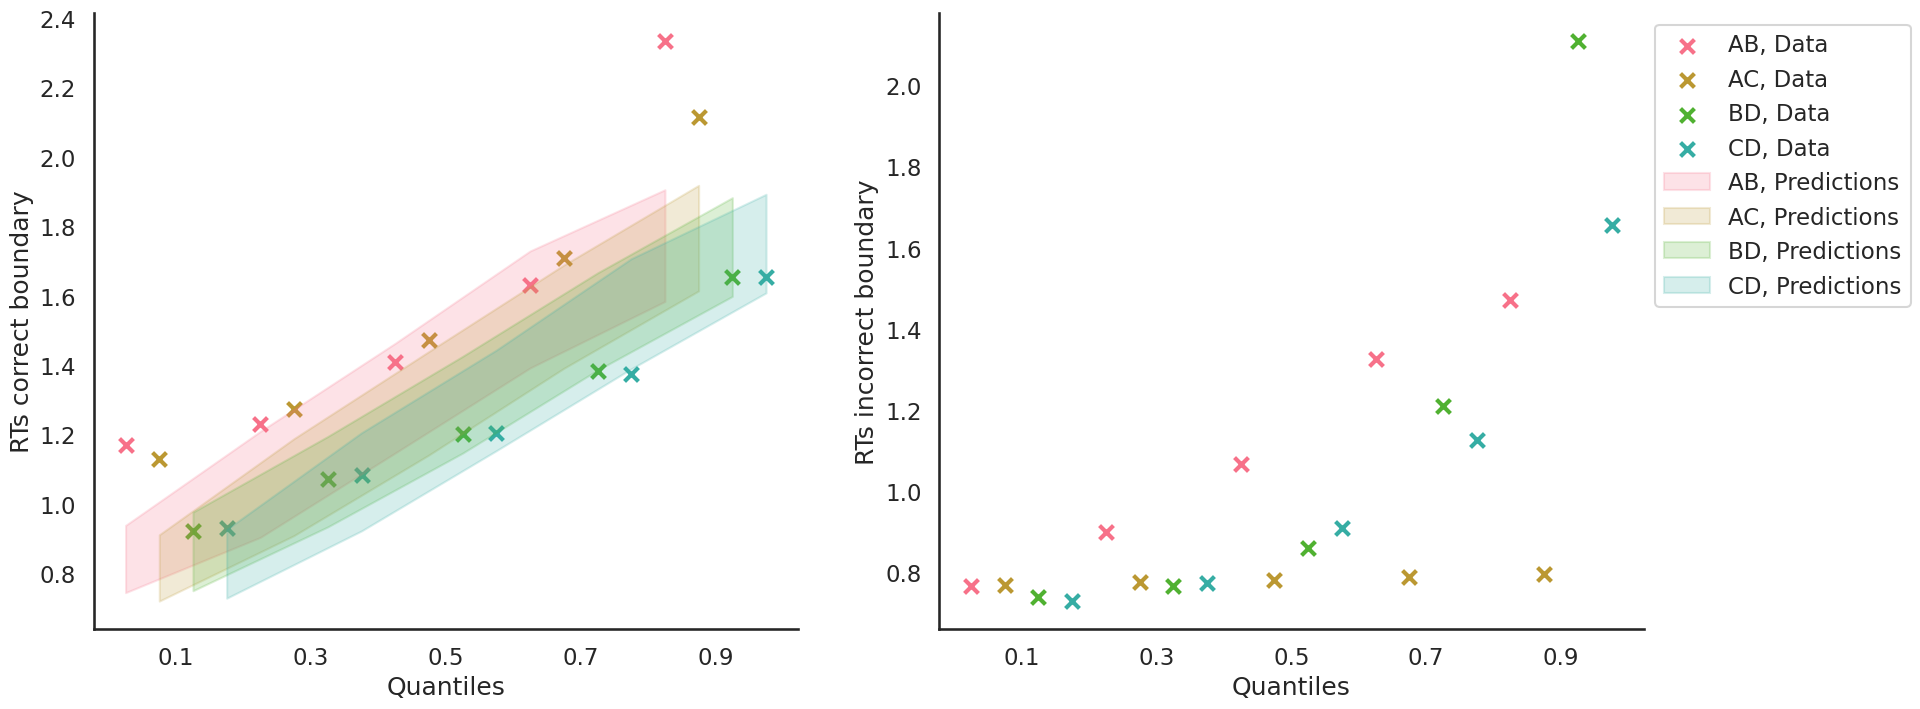

In [19]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9])

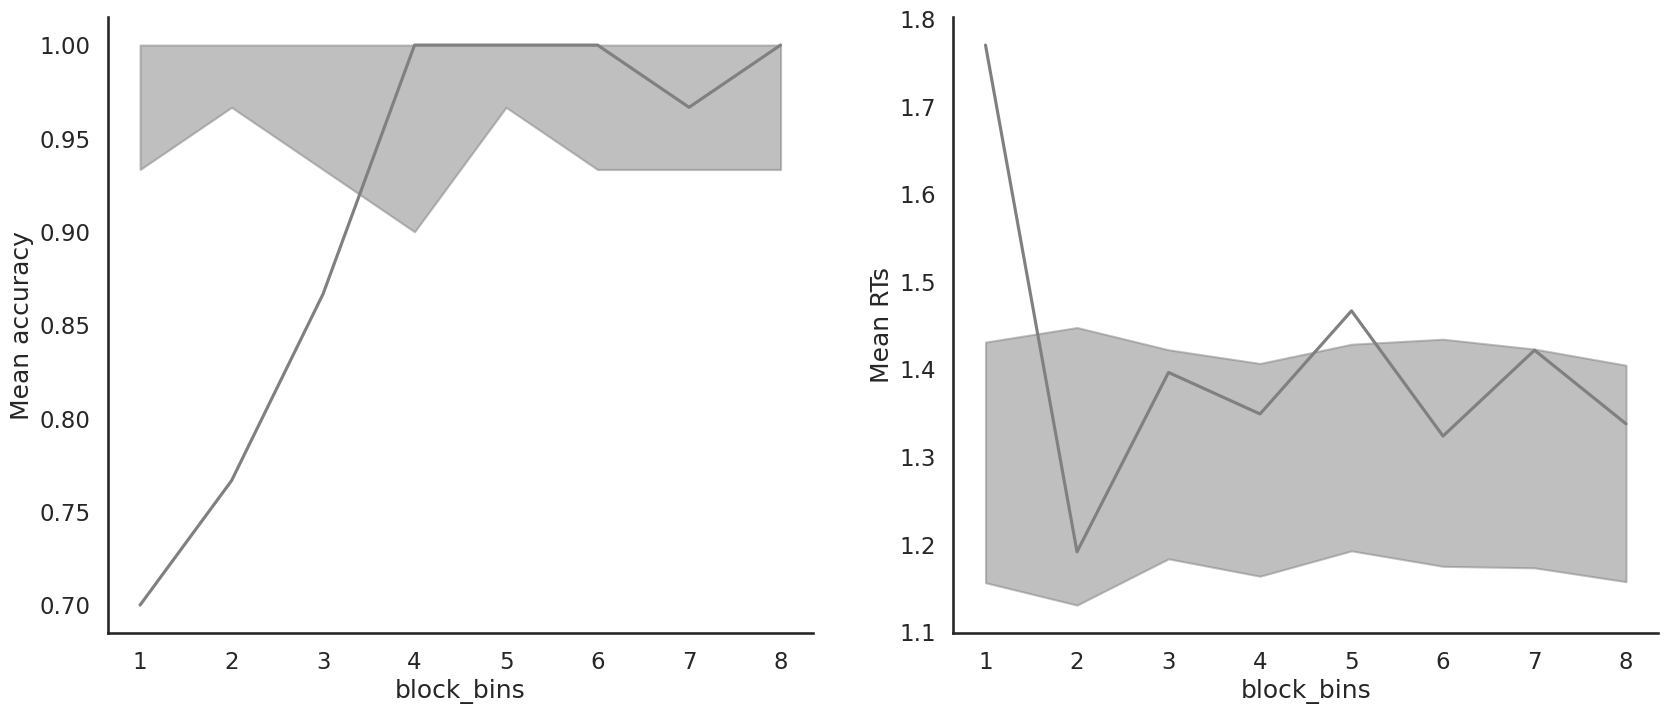

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=100,
                                                  figsize=(20, 8));

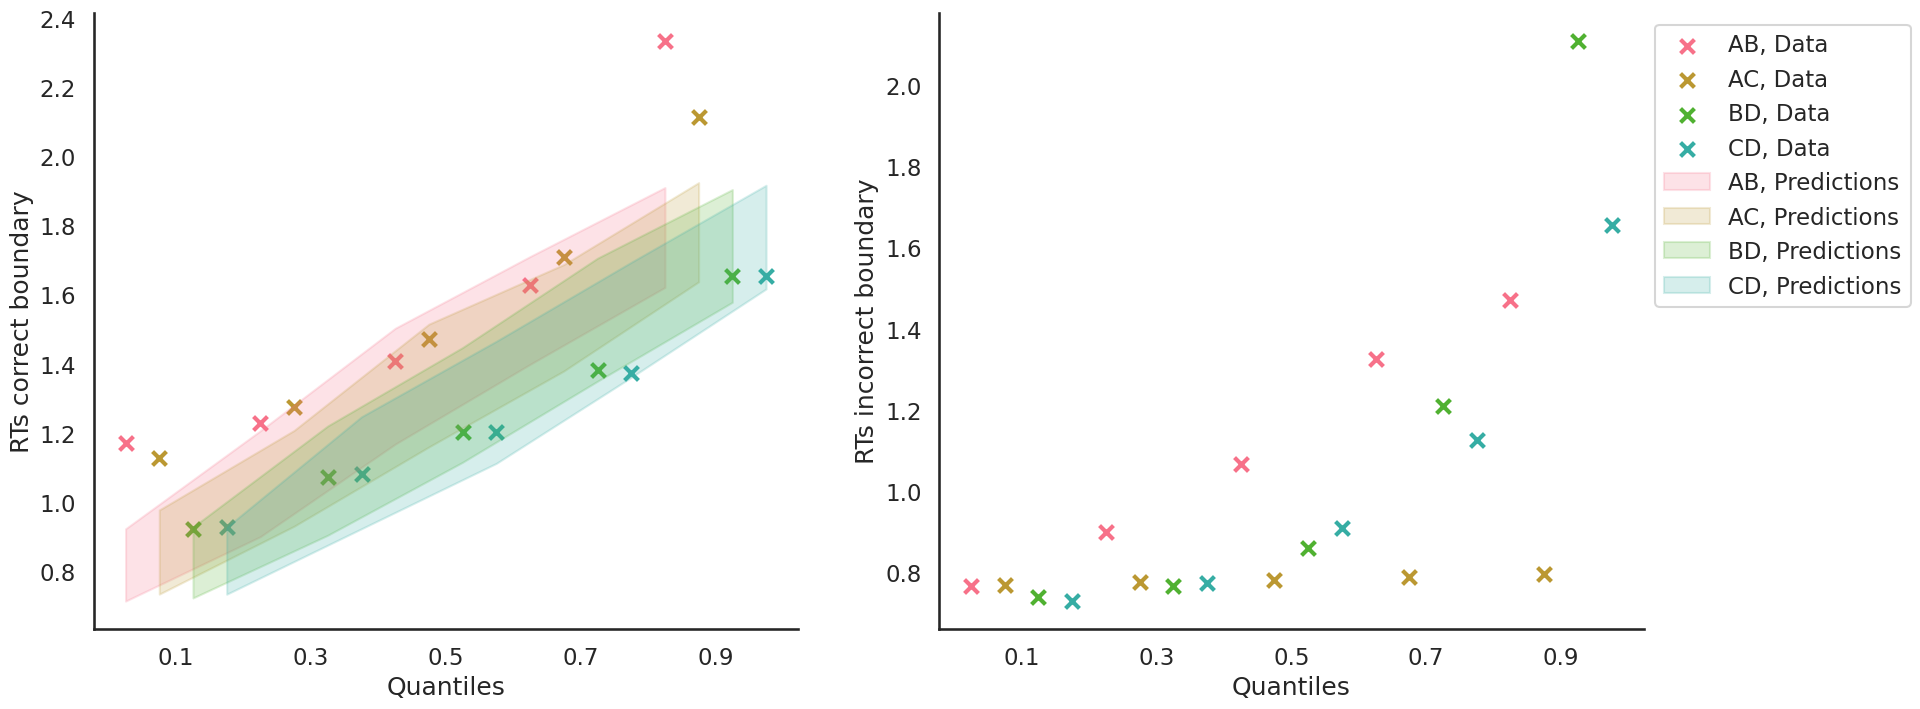

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);